In [227]:
import pandas as pd
import numpy as np
import requests
import yfinance as yf
from statistics import mean
import datetime
import pytz
import matplotlib.pyplot as plt
import xlsxwriter

In [228]:
# Listing the tickers/symbols of the investmenst we will study
tickers = ['ESGV', 'VSGX', 'SUSA', 'ESGE', 'SPY', 'BTC-USD']
# Creating column names for the final dataframe
my_columns = ['Ticker', 
              'Price', 
              'Ten-Year Annualised Price Return', 
              'Five-Year Annualised Price Return', 
              'Three-Year Annualised Price Return', 
              'One-Year Annualised Price Return', 
              'Six-Months Annualised Price Return', 
              'Three-Months Annualised Price Return', 
              'One-Months Annualised Price Return', 
              'Combined Momentum',
              'Ten-Year Annualised Volatility',
              'Ten-Year Sharpe Ratio',
              'Three-Year Annualised Volatility',
              'Three-Year Sharpe Ratio',
              'One-Year Annualised Volatility',
              'One-Year Sharpe Ratio',
              'Max Drawdown']
# Creating final dataframe to store data
final_df = pd.DataFrame(columns = my_columns)
final_df

,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown


In [229]:
# Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Reset
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [230]:
# Using the Yahoo finance package (API), we call the daily closing prices for the stocks chosen
data = yf.download(tickers, group_by='column', period="10y", interval='1d')
stock_df = pd.DataFrame(data[['Close']])

# ETF-type investment assets return NaN values for weekends and holidays when the market is closed. 
# To ensure continuity, we will fill these missing values with the last valid closing price for each instrument.
stock_df = stock_df.ffill()
stock_df

[*********************100%***********************]  6 of 6 completed


Price                             Close                                     \
Ticker                          BTC-USD       ESGE        ESGV         SPY   
Date                                                                         
2014-10-20 00:00:00+00:00           NaN        NaN         NaN  190.300003   
2014-10-21 00:00:00+00:00    386.475006        NaN         NaN  194.070007   
2014-10-22 00:00:00+00:00    383.157990        NaN         NaN  192.690002   
2014-10-23 00:00:00+00:00    358.416992        NaN         NaN  194.929993   
2014-10-24 00:00:00+00:00    358.345001        NaN         NaN  196.429993   
...                                 ...        ...         ...         ...   
2024-10-17 00:00:00+00:00  67399.835938  36.150002  103.120003  582.349976   
2024-10-18 00:00:00+00:00  68418.789062  36.540001  103.570000  584.590027   
2024-10-19 00:00:00+00:00  68362.734375  36.540001  103.570000  584.590027   
2024-10-20 00:00:00+00:00  69001.703125  36.540001  103.570000  584.590027   
2024-10-21 00:00:00+00:00  68195.257812  36.540001  103.570000  584.590027   

Price                                         
Ticker                           SUSA   VSGX  
Date                                          
2014-10-20 00:00:00+00:00   39.555000    NaN  
2014-10-21 00:00:00+00:00   40.259998    NaN  
2014-10-22 00:00:00+00:00   39.970001    NaN  
2014-10-23 00:00:00+00:00   40.445000    NaN  
2014-10-24 00:00:00+00:00   40.825001    NaN  
...                               ...    ...  
2024-10-17 00:00:00+00:00  121.379997  60.41  
2024-10-18 00:00:00+00:00  121.709999  60.82  
2024-10-19 00:00:00+00:00  121.709999  60.82  
2024-10-20 00:00:00+00:00  121.709999  60.82  
2024-10-21 00:00:00+00:00  121.709999  60.82  

[3655 rows x 6 columns]

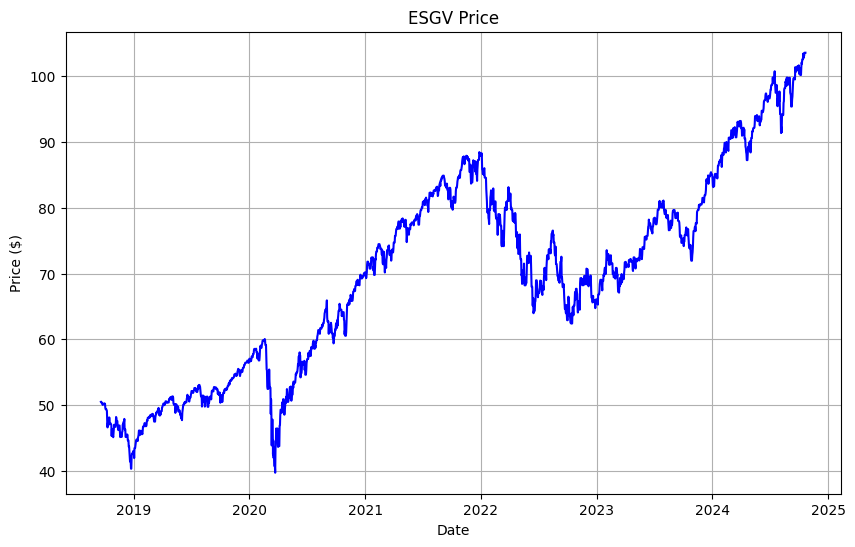

<Figure size 640x480 with 0 Axes>

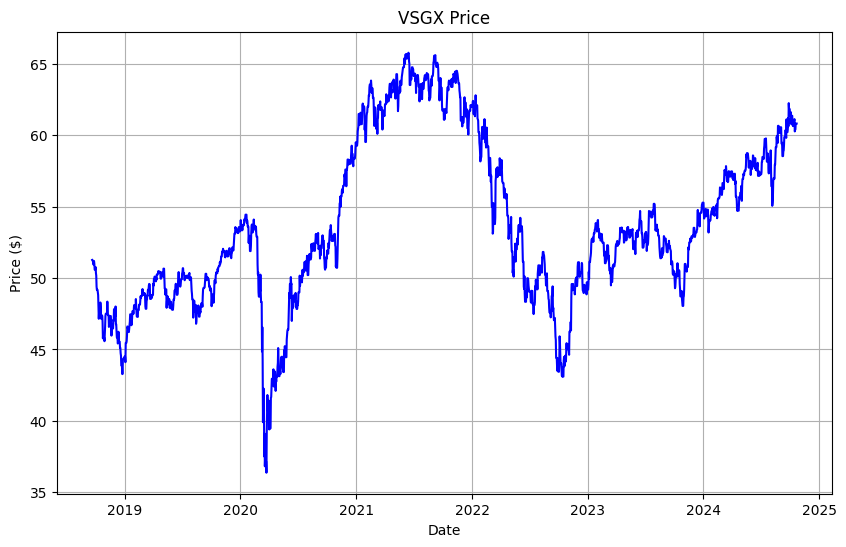

<Figure size 640x480 with 0 Axes>

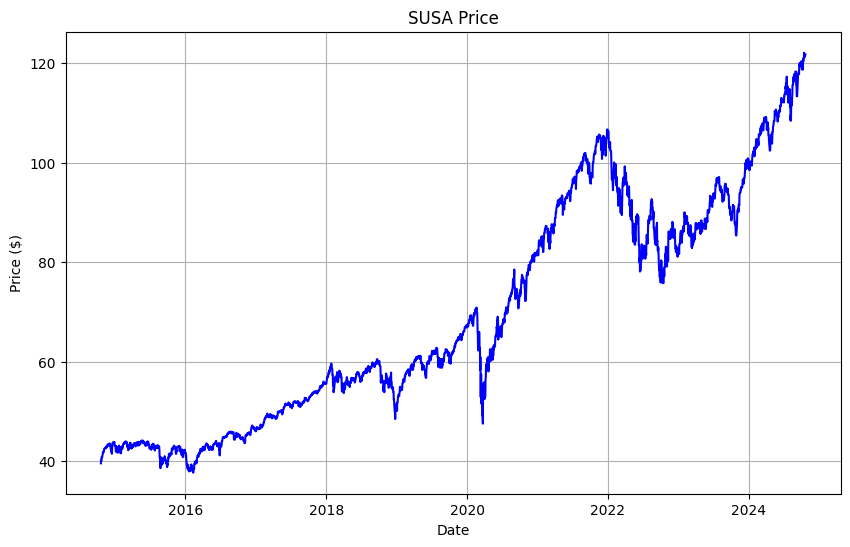

<Figure size 640x480 with 0 Axes>

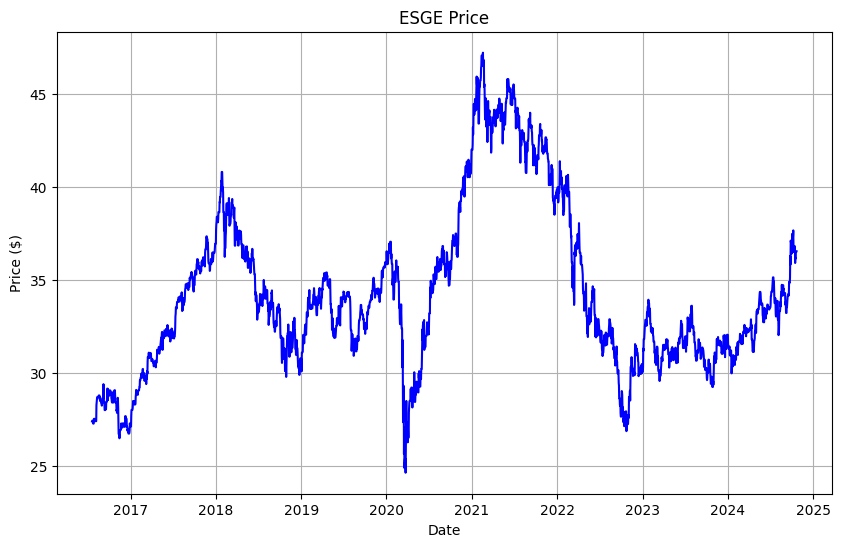

<Figure size 640x480 with 0 Axes>

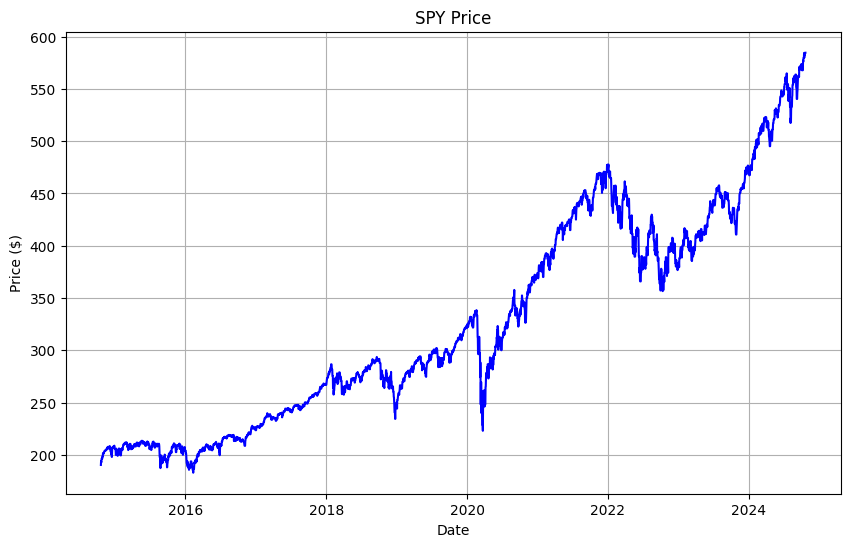

<Figure size 640x480 with 0 Axes>

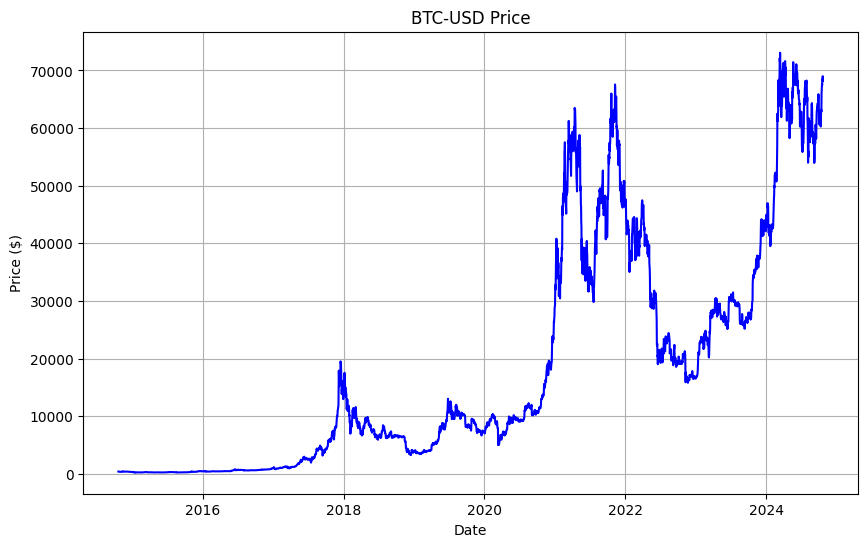

<Figure size 640x480 with 0 Axes>

In [231]:
# Plotting stock prices over time
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Close'][ticker], color='blue')
    plt.title(f'{ticker} Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.grid()
    plt.show()
    plt.savefig(f'{ticker} Price')

In [232]:
# Initialising a dictionary to store the latest prices
latest_prices = {}

# Looping through the columns and find the last available (non-NaN) values
for ticker in stock_df['Close'].columns:
    last_valid_time = stock_df['Close'][ticker].last_valid_index()
    latest_price = stock_df['Close'][ticker].loc[last_valid_time]
    latest_prices[ticker] = latest_price
    price_today = np.array(list(latest_prices.values())) # We will use this later 

# Now put the data in the 'Ticker' and 'Price' columns
final_df['Ticker'] = list(latest_prices.keys())
final_df['Price'] = list(latest_prices.values())
final_df

,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown
0,BTC-USD,68195.257812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESGE,36.540001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESGV,103.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPY,584.590027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SUSA,121.709999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VSGX,60.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
# Get today's date in the same format as yfinance date format above
utc = pytz.UTC
today = datetime.datetime.now(utc).replace(hour=0, minute=0, second=0, microsecond=0)
# Dictionary for the time periods
time_periods = {'Ten-Year': (today - datetime.timedelta(days=365*10), 10),
                'Five-Year': (today - datetime.timedelta(days=365*5), 5),
                'Three-Year': (today - datetime.timedelta(days=365*3), 3),
                'One-Year': (today - datetime.timedelta(days=365), 1),
                'Six-Months': (today - datetime.timedelta(days=365//2), 0.5),
                'Three-Months': (today - datetime.timedelta(days=365//4), 0.25),
                'One-Months': (today - datetime.timedelta(days=365//12), 1/12)}

# price_today = stock_df.loc['2024-10-19 00:00:00+00:00']['Close'].values

for period, (date, number) in time_periods.items():
    # Price for corresponding period
    period_price = stock_df.loc[date]['Close'].values
    # Calculating overall return for the period
    period_return = (price_today - period_price) / period_price
    # Now calculate the annualised return with the formula: (1 + Return) ^ (1 / N) - 1 = Annualised Return
    annualised_period_return = (1 + period_return) ** (1/number) - 1
    # Add the returns to the final dataframe
    final_df[f'{period} Annualised Price Return'] = annualised_period_return

final_df

,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown
0,BTC-USD,68195.257812,0.690228,0.554422,0.039618,1.273638,0.041036,0.036595,1.401061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESGE,36.540001,NaN,0.015651,-0.051419,0.241590,0.343893,0.330874,0.765182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESGV,103.570000,NaN,0.145727,0.070143,0.401678,0.383282,0.213935,0.399383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPY,584.590027,0.115230,0.142828,0.088628,0.387948,0.368514,0.234041,0.405217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SUSA,121.709999,0.115424,0.144166,0.061352,0.387799,0.390891,0.243774,0.258529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VSGX,60.820000,NaN,0.036946,-0.015613,0.248358,0.214429,0.150910,0.126336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
# Creating weights for the preiods
weights = {'One-Year': 0.4,
           'Six-Months': 0.3,
           'Three-Months': 0.2,
           'One-Months': 0.1}

# Calculate the combined momentum metric
final_df['Combined Momentum'] = (final_df['One-Year Annualised Price Return'] * weights['One-Year'] +
                                         final_df['Six-Months Annualised Price Return'] * weights['Six-Months'] +
                                         final_df['Three-Months Annualised Price Return'] * weights['Three-Months'] +
                                         final_df['One-Months Annualised Price Return'] * weights['One-Months'])

final_df

,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown
0,BTC-USD,68195.257812,0.690228,0.554422,0.039618,1.273638,0.041036,0.036595,1.401061,0.669191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESGE,36.540001,NaN,0.015651,-0.051419,0.241590,0.343893,0.330874,0.765182,0.342497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESGV,103.570000,NaN,0.145727,0.070143,0.401678,0.383282,0.213935,0.399383,0.358381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPY,584.590027,0.115230,0.142828,0.088628,0.387948,0.368514,0.234041,0.405217,0.353064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SUSA,121.709999,0.115424,0.144166,0.061352,0.387799,0.390891,0.243774,0.258529,0.346995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VSGX,60.820000,NaN,0.036946,-0.015613,0.248358,0.214429,0.150910,0.126336,0.206487,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
# Get daily returns for each stock
daily_returns = stock_df[['Close']].pct_change()

# Calculate annualised volatility for each time period and add it to the dataframe
for period, (date, number) in time_periods.items():
    for ticker in tickers:
        daily_period_returns = daily_returns['Close'][ticker].loc[date:]
        # Calculate the annualised volatility
        annualised_volatility = daily_period_returns.std() * np.sqrt(252)
        # Put the volatilities in the final dataframe
        if period == 'Ten-Year':
            final_df.loc[final_df['Ticker'] == ticker, 'Ten-Year Annualised Volatility'] = annualised_volatility
        elif period == 'Three-Year':
            final_df.loc[final_df['Ticker'] == ticker, 'Three-Year Annualised Volatility'] = annualised_volatility
        elif period == 'One-Year':
            final_df.loc[final_df['Ticker'] == ticker, 'One-Year Annualised Volatility'] = annualised_volatility

final_df

,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown
0,BTC-USD,68195.257812,0.690228,0.554422,0.039618,1.273638,0.041036,0.036595,1.401061,0.669191,0.576773,NaN,0.45471,NaN,0.434926,NaN,NaN
1,ESGE,36.540001,NaN,0.015651,-0.051419,0.241590,0.343893,0.330874,0.765182,0.342497,0.166,NaN,0.158136,NaN,0.135168,NaN,NaN
2,ESGV,103.570000,NaN,0.145727,0.070143,0.401678,0.383282,0.213935,0.399383,0.358381,0.175948,NaN,0.159432,NaN,0.113013,NaN,NaN
3,SPY,584.590027,0.115230,0.142828,0.088628,0.387948,0.368514,0.234041,0.405217,0.353064,0.146691,NaN,0.145945,NaN,0.102204,NaN,NaN
4,SUSA,121.709999,0.115424,0.144166,0.061352,0.387799,0.390891,0.243774,0.258529,0.346995,0.148459,NaN,0.151696,NaN,0.104458,NaN,NaN
5,VSGX,60.820000,NaN,0.036946,-0.015613,0.248358,0.214429,0.150910,0.126336,0.206487,0.152911,NaN,0.137542,NaN,0.112572,NaN,NaN


In [236]:

# Risk-free rate (assuming it's 4% annually)
risk_free_rate = 0.04
# Calculating the Sharpe Ratio using the annualised volatility values
final_df['Ten-Year Sharpe Ratio'] = ((final_df['Ten-Year Annualised Price Return'] - risk_free_rate) / 
                                            final_df['Ten-Year Annualised Volatility'])
final_df['Three-Year Sharpe Ratio'] = ((final_df['Three-Year Annualised Price Return'] - risk_free_rate) / 
                                            final_df['Three-Year Annualised Volatility'])
final_df['One-Year Sharpe Ratio'] = ((final_df['One-Year Annualised Price Return'] - risk_free_rate) / 
                                            final_df['One-Year Annualised Volatility'])

final_df

,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown
0,BTC-USD,68195.257812,0.690228,0.554422,0.039618,1.273638,0.041036,0.036595,1.401061,0.669191,0.576773,1.127355,0.45471,-0.000841,0.434926,2.836429,NaN
1,ESGE,36.540001,NaN,0.015651,-0.051419,0.241590,0.343893,0.330874,0.765182,0.342497,0.166,NaN,0.158136,-0.578105,0.135168,1.491405,NaN
2,ESGV,103.570000,NaN,0.145727,0.070143,0.401678,0.383282,0.213935,0.399383,0.358381,0.175948,NaN,0.159432,0.189067,0.113013,3.200334,NaN
3,SPY,584.590027,0.115230,0.142828,0.088628,0.387948,0.368514,0.234041,0.405217,0.353064,0.146691,0.512847,0.145945,0.333191,0.102204,3.404439,NaN
4,SUSA,121.709999,0.115424,0.144166,0.061352,0.387799,0.390891,0.243774,0.258529,0.346995,0.148459,0.508047,0.151696,0.140756,0.104458,3.329573,NaN
5,VSGX,60.820000,NaN,0.036946,-0.015613,0.248358,0.214429,0.150910,0.126336,0.206487,0.152911,NaN,0.137542,-0.404331,0.112572,1.850879,NaN


In [237]:
# Calculate maximum drawdown 
for ticker in tickers:
    cumulative_returns = (1 + daily_returns['Close'][ticker]).cumprod() # Cumulative returns
    running_max = cumulative_returns.cummax() # Running maximum of cumulative returns
    drawdown = (cumulative_returns - running_max) / running_max # Drawdown
    max_drawdown = drawdown.min() # Maximum (minimum negative) drawdown 
    # Put the max drawdowns in the final dataframe
    final_df.loc[final_df['Ticker'] == ticker, 'Max Drawdown'] = max_drawdown

final_df


,Ticker,Price,Ten-Year Annualised Price Return,Five-Year Annualised Price Return,Three-Year Annualised Price Return,One-Year Annualised Price Return,Six-Months Annualised Price Return,Three-Months Annualised Price Return,One-Months Annualised Price Return,Combined Momentum,Ten-Year Annualised Volatility,Ten-Year Sharpe Ratio,Three-Year Annualised Volatility,Three-Year Sharpe Ratio,One-Year Annualised Volatility,One-Year Sharpe Ratio,Max Drawdown
0,BTC-USD,68195.257812,0.690228,0.554422,0.039618,1.273638,0.041036,0.036595,1.401061,0.669191,0.576773,1.127355,0.45471,-0.000841,0.434926,2.836429,-0.83399
1,ESGE,36.540001,NaN,0.015651,-0.051419,0.241590,0.343893,0.330874,0.765182,0.342497,0.166,NaN,0.158136,-0.578105,0.135168,1.491405,-0.430176
2,ESGV,103.570000,NaN,0.145727,0.070143,0.401678,0.383282,0.213935,0.399383,0.358381,0.175948,NaN,0.159432,0.189067,0.113013,3.200334,-0.338551
3,SPY,584.590027,0.115230,0.142828,0.088628,0.387948,0.368514,0.234041,0.405217,0.353064,0.146691,0.512847,0.145945,0.333191,0.102204,3.404439,-0.341047
4,SUSA,121.709999,0.115424,0.144166,0.061352,0.387799,0.390891,0.243774,0.258529,0.346995,0.148459,0.508047,0.151696,0.140756,0.104458,3.329573,-0.329335
5,VSGX,60.820000,NaN,0.036946,-0.015613,0.248358,0.214429,0.150910,0.126336,0.206487,0.152911,NaN,0.137542,-0.404331,0.112572,1.850879,-0.344786


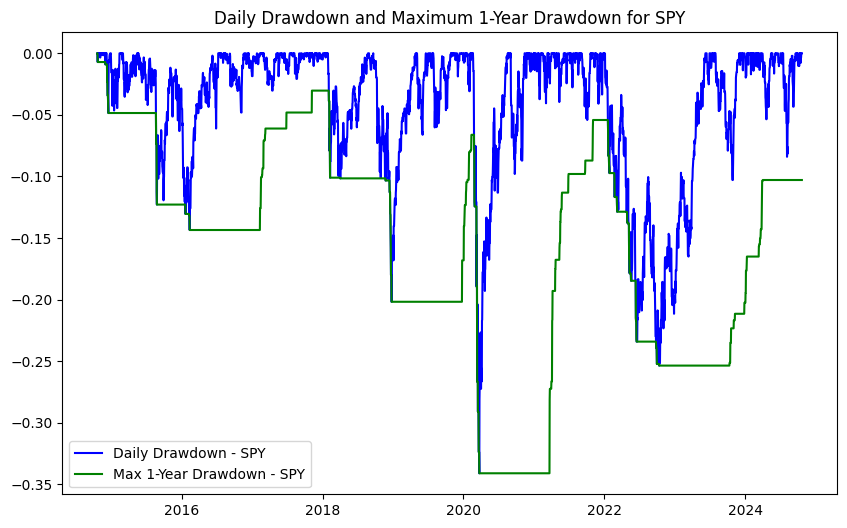

In [238]:
# idea from https://quant.stackexchange.com/questions/18094/how-can-i-calculate-the-maximum-drawdown-mdd-in-python

symbol = 'SPY' # Change symbol and rerun cell to get the graph for the desired stock ['ESGV', 'VSGX', 'SUSA', 'ESGE', 'SPY', 'BTC-USD']
window = 365 # Number of days

# Calculate the rolling maximum closing price for the past 365 days
Roll_Max = stock_df['Close'][symbol].rolling(window, min_periods=1).max()

# Calculate the daily drawdown (current price relative to the rolling maximum)
Daily_Drawdown = stock_df['Close'][symbol] / Roll_Max - 1.0

# Calculate the maximum drawdown in the past 365 days (minimum daily drawdown)
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot daily drawdown and maximum drawdown
plt.figure(figsize=(10, 6))
plt.plot(Daily_Drawdown, label=f'Daily Drawdown - {symbol}', color='blue')
plt.plot(Max_Daily_Drawdown, label=f'Max 1-Year Drawdown - {symbol}', color='green')
plt.title(f'Daily Drawdown and Maximum 1-Year Drawdown for {symbol}')
plt.legend()
plt.show()

In [239]:
# Convert the index (datetime) to timezone-naive - needed to save in Excel
stock_df.index = stock_df.index.tz_localize(None)

# Save the dataframes to an Excel file
with pd.ExcelWriter('BC_homework.xlsx', engine='xlsxwriter') as writer:
    stock_df.to_excel(writer, sheet_name='stock_prices', index=True)
    final_df.to_excel(writer, sheet_name='final_dataframe', index=True)
